In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
alpha = 0.5
epsilon = 0.1
gamma = 1
x_length = 12
y_length = 4

In [3]:
def observe(x,y,a):
    goal = 0
    if x == x_length - 1 and y == 0:
        goal = 1
    if a == 0:
        y += 1
    if a == 1:
        x += 1
    if a == 2:
        y -= 1
    if a == 3:
        x -= 1
        
    x = max(0,x)
    x = min(x_length-1, x)
    y = max(0,y)
    y = min(y_length-1, y)
# the last step still has four directions to choose, 
# it need next state to update q, and reward is -1, but after the last step, 
# it doesn't need to take the next state and action
    if goal == 1:
        return x,y,-1
    if x>0 and x<x_length-1 and y==0:
        return 0,0,-100
    return x,y,-1

In [4]:
# this equals to observe(x,y,q,a)
actionRewards = np.zeros((x_length, y_length, 4))
actionRewards[:, :, :] = -1.0
actionRewards[1:11, 1, 2] = -100.0
actionRewards[0, 0, 1] = -100.0

actionDestination = []
for i in range(0, 12):
    actionDestination.append([])
    for j in range(0, 4):
        destination = dict()
        destination[0] = [i, min(j+1,3)]
        destination[1] = [min(i+1,11), j]
        if 0 < i < 11 and j == 1:
            destination[2] = [0,0]
        else:
            destination[2] = [i, max(j - 1, 0)]
        destination[3] = [max(i-1,0), j]
        actionDestination[-1].append(destination)
actionDestination[0][0][1] = [0,0]

In [5]:
for i in range(12):
    for j in range(4):
        for k in range(4):
            x_next, y_next, reward = observe(i,j,k)
            if [x_next,y_next] != actionDestination[i][j][k]:
                print("next: ",i,j,k,actionDestination[i][j][k],x_next,y_next)
            if reward != actionRewards[i][j][k]:
                print("reward: ",i,j,k,actionRewards[i][j][k],reward)

next:  1 0 1 [2, 0] 0 0
reward:  1 0 1 -1.0 -100
next:  1 0 2 [1, 0] 0 0
reward:  1 0 2 -1.0 -100
next:  2 0 1 [3, 0] 0 0
reward:  2 0 1 -1.0 -100
next:  2 0 2 [2, 0] 0 0
reward:  2 0 2 -1.0 -100
next:  2 0 3 [1, 0] 0 0
reward:  2 0 3 -1.0 -100
next:  3 0 1 [4, 0] 0 0
reward:  3 0 1 -1.0 -100
next:  3 0 2 [3, 0] 0 0
reward:  3 0 2 -1.0 -100
next:  3 0 3 [2, 0] 0 0
reward:  3 0 3 -1.0 -100
next:  4 0 1 [5, 0] 0 0
reward:  4 0 1 -1.0 -100
next:  4 0 2 [4, 0] 0 0
reward:  4 0 2 -1.0 -100
next:  4 0 3 [3, 0] 0 0
reward:  4 0 3 -1.0 -100
next:  5 0 1 [6, 0] 0 0
reward:  5 0 1 -1.0 -100
next:  5 0 2 [5, 0] 0 0
reward:  5 0 2 -1.0 -100
next:  5 0 3 [4, 0] 0 0
reward:  5 0 3 -1.0 -100
next:  6 0 1 [7, 0] 0 0
reward:  6 0 1 -1.0 -100
next:  6 0 2 [6, 0] 0 0
reward:  6 0 2 -1.0 -100
next:  6 0 3 [5, 0] 0 0
reward:  6 0 3 -1.0 -100
next:  7 0 1 [8, 0] 0 0
reward:  7 0 1 -1.0 -100
next:  7 0 2 [7, 0] 0 0
reward:  7 0 2 -1.0 -100
next:  7 0 3 [6, 0] 0 0
reward:  7 0 3 -1.0 -100
next:  8 0 1 [9, 0] 

In [6]:
def epsilon_policy(x,y,q,eps):
    t = random.randint(0,3)
    if random.random() < eps:
        a = t
    else:
        q_max = q[x][y][0]
        a_max = 0
        for i in range(4):
            if q[x][y][i] >= q_max:
                q_max = q[x][y][i]
                a_max = i
        a = a_max
    return a

def max_q(x,y,q):
    q_max = q[x][y][0]
    a_max = 0
    for i in range(4):
        if q[x][y][i] >= q_max:
            q_max = q[x][y][i]
            a_max = i
    a = a_max
    return a

In [7]:
#sarsa on-policy
def sarsa_on_policy(q):
    runs = 20
    rewards = np.zeros([500])
    for j in range(runs):
        for i in range(500):
            reward_sum = 0
            x = 0
            y = 0
            a = epsilon_policy(x,y,q,epsilon)
            while True:
                [x_next,y_next] = actionDestination[x][y][a]
                reward = actionRewards[x][y][a]
                reward_sum += reward
                a_next = epsilon_policy(x_next,y_next,q,epsilon)
                q[x][y][a] += alpha*(reward + gamma*q[x_next][y_next][a_next]-q[x][y][a])
                if x == x_length - 1 and y==0:
                    break
                x = x_next
                y = y_next
                a = a_next
            rewards[i] += reward_sum
    rewards /= runs
    avg_rewards = []
    for i in range(9):
        avg_rewards.append(np.mean(rewards[:i+1]))
    for i in range(10,len(rewards)+1):
        avg_rewards.append(np.mean(rewards[i-10:i]))
    return avg_rewards

In [8]:
def q_learning(q):
    runs = 20
    rewards = np.zeros([500])
    for j in range(runs):
        for i in range(500):
            reward_sum = 0
            x = 0
            y = 0
            while True:
                a = epsilon_policy(x,y,q,epsilon)             
                x_next, y_next,reward = observe(x,y,a)
                a_next = max_q(x_next,y_next,q)
                reward_sum += reward
                q[x][y][a] += alpha*(reward + gamma*q[x_next][y_next][a_next]-q[x][y][a])
                if x == x_length - 1 and y==0:
                    break
                x = x_next
                y = y_next
            rewards[i] += reward_sum
    rewards /= runs
    avg_rewards = []
    for i in range(9):
        avg_rewards.append(np.mean(rewards[:i+1]))
    for i in range(10,len(rewards)+1):
        avg_rewards.append(np.mean(rewards[i-10:i]))
    return avg_rewards

In [9]:
q = np.zeros([12,4,4])
sarsa_rewards = sarsa_on_policy(q)

In [10]:
qq = np.zeros([12,4,4])
q_learning_rewards = q_learning(qq)

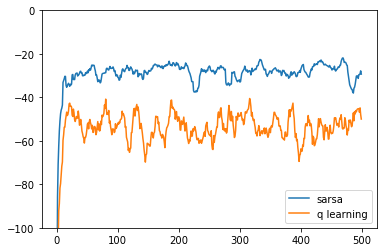

In [11]:
plt.plot(range(len(sarsa_rewards)),sarsa_rewards,label="sarsa")
plt.plot(range(len(sarsa_rewards)),q_learning_rewards,label="q learning")
plt.ylim(-100,0)
plt.legend(loc="lower right")
plt.show()

In [12]:
def OptimalPolicy(q):
    for j in range(y_length-1,-1,-1):
        for i in range(x_length):
            a = max_q(i,j,q)
            if a == 0:
                print("↑ ",end = "")
            if a == 1:
                print("→ ",end = "")
            if a == 2:
                print("↓ ",end = "")
            if a == 3:
                print("← ",end = "")
        print("")
    print("")
print("Sarsa Optimal Policy")
OptimalPolicy(q)
print("Q-learning Optimal Policy")
OptimalPolicy(qq)

Sarsa Optimal Policy
→ → → → → → → → → → → ↓ 
→ ↑ ↑ ↑ ↑ ↑ → → ↑ ← ↑ ↓ 
↑ ← ↑ ↑ ↑ ← ← ↑ ↑ ↑ → ↓ 
↑ ← ← ← ← ← ← ← ← ← ← ← 

Q-learning Optimal Policy
← ↓ → → → ↓ → → → ↓ → ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ ↓ 
→ → → → → → → → → → → ↓ 
↑ ← ← ← ← ← ← ← ← ← ← ← 



In [13]:
def OptimalPath(q):
    x = 0
    y = 0
    path = np.zeros([x_length,y_length]) - 1
    end = 0
    exist = np.zeros([x_length,y_length])
    while (x != x_length-1 or y != 0) and end == 0:
        a = max_q(x,y,q)
        path[x][y] = a
        if exist[x][y] == 1:
            end = 1
        exist[x][y] = 1
        x,y,r = observe(x,y,a)
    for j in range(y_length-1,-1,-1):
        for i in range(x_length):
            if i == x_length-1 and j == 0:
                print(" G ",end = "")
                continue
            a = path[i,j]
            if a == -1:
                print(" 0 ",end = "")
            elif a == 0:
                print("↑ ",end = "")
            elif a == 1:
                print("→ ",end = "")
            elif a == 2:
                print("↓ ",end = "")
            elif a == 3:
                print("← ",end = "")
        print("")    

In [14]:
OptimalPath(q)

 0 → → → → → → → → → → ↓ 
→ ↑  0  0  0  0  0  0  0  0  0 ↓ 
↑  0  0  0  0  0  0  0  0  0  0 ↓ 
↑  0  0  0  0  0  0  0  0  0  0  G 


In [15]:
OptimalPath(qq)

 0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0 
→ → → → → → → → → → → ↓ 
↑  0  0  0  0  0  0  0  0  0  0  G 
